# Predicting Insurance Price using `scikit-learn` Linear Regression Model

## [Dataset Reference](https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv)

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

## 2. Loading the Dataset

In [2]:
df = pd.read_csv("insurance.csv")

## 3. Exploratory Data Analysis

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### There are no missing data

In [6]:
numeric_cols = df._get_numeric_data().columns
categorical_cols = df.drop(columns=numeric_cols).columns


print(f"Numerical Columns:", end=" ")
for c in numeric_cols:
    print(f"{c},", end=" ")
    

print()
print(f"Categorical Columns: ", end=" ")
for c in categorical_cols:
    print(f"{c}, ", end=" ")

Numerical Columns: age, bmi, children, charges, 
Categorical Columns:  sex,  smoker,  region,  

In [7]:
num_rows = len(df.count(axis=1))
num_cols = len(df.count(axis=0))

print(f"There are {num_rows} rows and {num_cols} columns.")

There are 1338 rows and 7 columns.


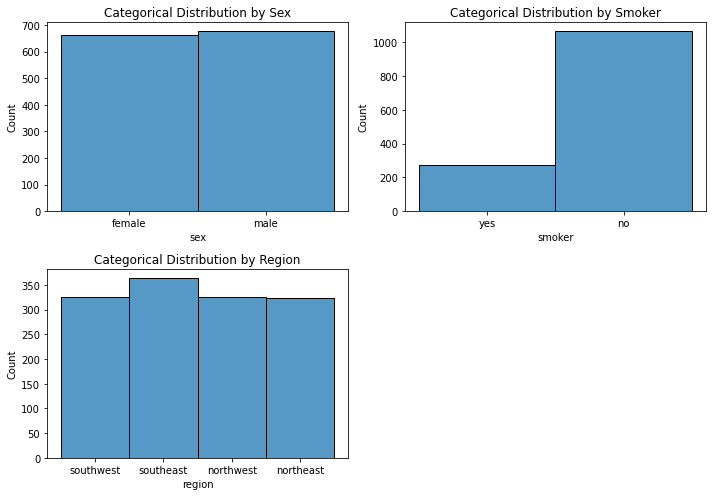

In [8]:
def plot_categorical(cols, df):
    num_cols = len(cols)
    
    subpl_row = int(np.ceil(num_cols / 2))
    
    plt.figure(figsize=(10, 7))
    
    for i, c in enumerate(cols):
        plt.subplot(subpl_row, 2, i+1)
        sns.histplot(df[c])
        plt.title(f"Categorical Distribution by {c.title()}")
        
    
    plt.tight_layout()    
    plt.show()
    
plot_categorical(categorical_cols, df)

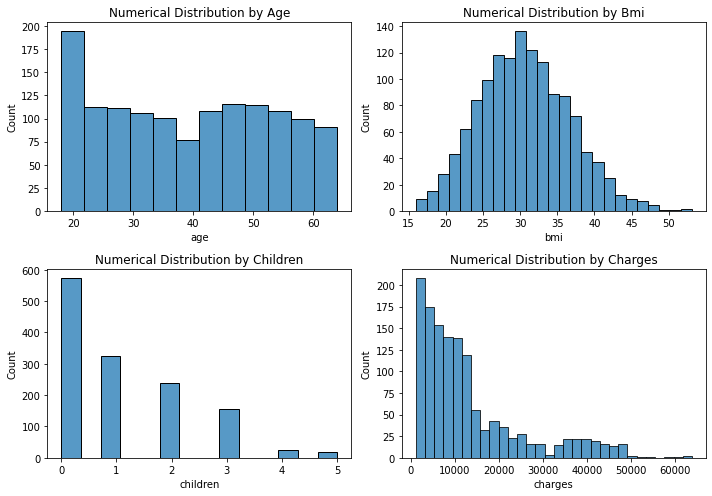

In [10]:
def numerical_distribution(cols, df):
    num_cols = len(cols)
    
    subpl_row = int(np.ceil(num_cols / 2))
    
    plt.figure(figsize=(10, 7))
    
    for i, c in enumerate(cols):
        plt.subplot(subpl_row, 2, i+1)
        sns.histplot(df[c])
        plt.title(f"Numerical Distribution by {c.title()}")
        
    
    plt.tight_layout()    
    plt.show()
    
numerical_distribution(numeric_cols, df)

## 4. Numerical Encoding of Categorical Features

In [11]:
df_one_hot = pd.get_dummies(df)
df_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [12]:
X = df_one_hot.drop(columns=["charges"])
y = df_one_hot["charges"]

In [13]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [14]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## 5. Split data into training and testing set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [17]:
len(X_train), len(X_test)

(1070, 268)

In [18]:
len(X_test) / len(X_train) * 100

25.04672897196262

## 6. Linear Regression Analysis

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

In [22]:
model.score(X_test, y_test)

0.7990637930035748

In [23]:
model.score(X_train, y_train)

0.7385339139130734

### $R^2 (test): 0.799$
### $R^2 (train): 0.739$

**Conclusion**: There is a positive correlation between the *features (age, sex, bmi, number of children, smoker, region)* and the *label (amount of hospital charges)*